#**Fake news detection**

This notebook shows some ways to use NLP in processing data to differentiate between real and fake news.

The notebook is divided into the following parts:

1.Mounting the data from google drive

2.Converting the data from json to csv format

3.Data Preprocessing
>3.1.

Accessing the data from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [75]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import seaborn as sns
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The user google drive has been successfully mounted. The dataset for fake news detection is present in the google drive under the name fake_news.json.

The next step is to convert the data from json to csv format. For this a library is needed. This library is knows as [**Pandas**](https://en.wikipedia.org/wiki/Pandas_(software)) and it offers data structures and operations for manipulating numerical tables and time series.

Next is reading the data and naming it as fake_news

In [29]:
import pandas as pd

df = pd.read_json('/content/drive/My Drive/fake_news.json', lines=True).to_csv("/content/drive/My Drive/fake_news.csv")
fake_news = pd.read_csv('/content/drive/My Drive/fake_news.csv')

Going through the dataset given

The command **.head()** shows the first five rows of the dataset. 

In [30]:
fake_news.head()

,Unnamed: 0,is_sarcastic,headline,article_link
0,0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


The total number values in the dataset can be seeked by **.info()**

The dataset has 28619 non-null objects

In [31]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    28619 non-null  int64 
 1   is_sarcastic  28619 non-null  int64 
 2   headline      28619 non-null  object
 3   article_link  28619 non-null  object
dtypes: int64(2), object(2)
memory usage: 894.5+ KB


On checking the head of the data, it can be seen that it consists of five columns. 
>The first is the numbering given on calling the **head** function (whose function is only numbering the row items) .

>The second is an unnamed column which functions same as point 1.

>The third column **is_sarcastic** gives the verdic whether the given news is sarcastic or not.

>The fourth column contains the news headline.

>The fifth column contains the article links.

The first three columns do not generate any valuable information and are discarded 

In [38]:
fake_news.columns

Index(['Unnamed: 0', 'is_sarcastic', 'headline'], dtype='object')

In [ ]:
# dropping the unrequired columns
fake_news = fake_news.drop(columns="article_link")
fake_news = fake_news.drop(columns="Unnamed: 0")


There are only two columns left **is_sarcastic** and **headline**

In [41]:
fake_news.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


Creating the [**dependent variable**](https://www.pluralsight.com/guides/importing-and-splitting-data-into-dependent-and-independent-features-for-ml)

In [42]:
dependent_variable = fake_news['is_sarcastic']

The output for each of the three steps are given below:

>Finding null value

>Splitting the dataset into train,test and valid dataset

>The total word count in each row


In [64]:
# checking null values
print("\nchecking null value:\n", fake_news.isna().sum())


# split the dataset into training and validation datasets 
trainset_x, validset_x, trainset_y, validset_y = model_selection.train_test_split(fake_news , dependent_variable, test_size=0.25, random_state=0)

#number of words
trainset_x['word_count'] = trainset_x['headline'].apply(lambda x: len(str(x).split(" ")))
trainset_x[['headline','word_count','is_sarcastic']].head()


checking null value:
 is_sarcastic    0
headline        0
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,headline,word_count,is_sarcastic
15579,kfc urged to stop routine use of antibiotics o...,10,0
27057,north korea may test-launch missile around don...,12,0
3311,why exercising your sense of humor is so impor...,9,0
6482,freezing woman dining outside desperately clut...,10,1
12944,defiant north korea launches what appears to b...,9,0


The **frequency** of words is calculated and most common words are shown

In [65]:
#frequency of word before stop words removal
freq = Counter(" ".join(trainset_x["headline"]).split()).most_common(20)
#freq.columns('word','frequency')
freq1 = pd.DataFrame(freq, columns= ['Words','Frequency'])
freq1.head()

,Words,Frequency
0,to,6780
1,of,4680
2,the,3957
3,in,3385
4,for,2675


A wordcloud is generated.

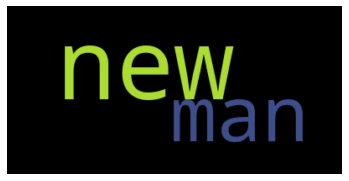

In [136]:
wordcloud = WordCloud(max_words = 2).generate(' '.join(freq1['Words']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

A bar graph is plotted which shows the **frequency** of top 20 words.

Text(0.5, 1.0, 'Frequency of top 20 words')

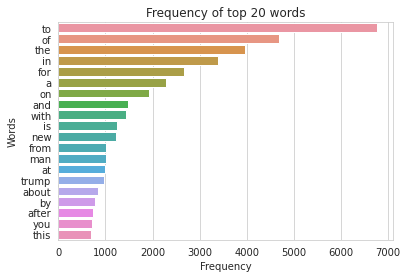

In [54]:
#visualization
# Bar Plot 
sns.set_style('whitegrid')
sns.barplot( x = 'Frequency', y ='Words',data=freq1)
plt.title('Frequency of top 20 words')


Removal of [**stop words**](https://en.wikipedia.org/wiki/Stop_words) .

In [57]:
#removing stop words
stop = stopwords.words('english')
trainset_x['headline'] = trainset_x['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
trainset_x['headline'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


15579       kfc urged stop routine use antibiotics poultry
27057    north korea may test-launch missile around don...
3311                      exercising sense humor important
6482     freezing woman dining outside desperately clut...
12944            defiant north korea launches appears icbm
Name: headline, dtype: object

The **frequency** of words after removal of stop words is displayed below.

In [60]:
#freq of words after stop words removal
freq = Counter(" ".join(trainset_x["headline"]).split()).most_common(20)
#freq.columns('word','frequency')
freq4 = pd.DataFrame(freq, columns= ['Words','Frequency'])
freq4.head()

,Words,Frequency
0,new,1230
1,man,1003
2,trump,972
3,area,391
4,one,388


A **wordcloud** is generated post removal of stop words.

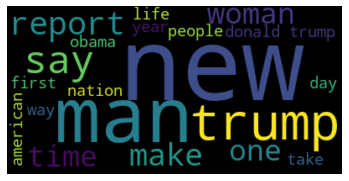

In [62]:
wordcloud = WordCloud(max_words = 20).generate(' '.join(trainset_x['headline']))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

>The column **is_sarcastic** and **word_count** is removed as it holds no value.

>The column **headline** is converted to lowercase.

>**Label Encoding** is processed.

In [67]:
# dropping the 'is_sarcastic" and "word _count" column
trainset_x = trainset_x.drop(columns="is_sarcastic")
trainset_x = trainset_x.drop(columns="word_count")

#lowercase
trainset_x['headline'] = trainset_x['headline'].apply(lambda x: " ".join(x.lower() for x in x.split()))
trainset_x['headline'].head()

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
trainset_y = encoder.fit_transform(trainset_y)
validset_y = encoder.fit_transform(validset_y)




Both common and uncommon words do not add value.

1.   Uncommon word identification and its removal.
2.   Common word identification and its removal.



In [102]:
#uncommon word identification
freq = pd.Series(' '.join(trainset_x['headline']).split()).value_counts()[-10:]
freq


#removal of uncommon words
freq = list(freq.index)
trainset_x['headline'] = trainset_x['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
trainset_x['headline'].head()


#identification and removal of common words
freq = pd.Series(' '.join(trainset_x['headline']).split()).value_counts()[:10]
freq

#removal of common words
freq = list(freq.index)
trainset_x['headline'] = trainset_x['headline'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
trainset_x['headline'].head()


15579        kfc urged stop routine use antibiotic poultry
27057    north korea may test-launch missile around don...
3311          why exercising your sense humor so important
6482     freezing dining outside desperately clutching ...
12944         defiant north korea launch what appears icbm
Name: headline, dtype: object

**Stemming** and **Lemmatization**

The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. For instance:

am, are, is $\Rightarrow$ be

car, cars, car's, cars' $\Rightarrow$ car

In [104]:
#stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
trainset_x['headline'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


#lemma
from textblob import Word
trainset_x['headline'] = trainset_x['headline'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
trainset_x['headline'].head()


15579        kfc urged stop routine use antibiotic poultry
27057    north korea may test-launch missile around don...
3311          why exercising your sense humor so important
6482     freezing dining outside desperately clutching ...
12944         defiant north korea launch what appears icbm
Name: headline, dtype: object

The porpose of **Count Vectorizer** is to convert a collection of text documents to a matrix of token counts.

In [130]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainset_x['headline'])
text = trainset_x['headline']
text2 = validset_x['headline']

# transform the training and validation data using count vectorizer object
xtrainset_count =  count_vect.transform(text)
xvalidset_count =  count_vect.transform(text2)

#xtrainset_count= xtrainset_count.transpose()
xtrainset_count.shape
xvalidset_count.shape

(7155, 21220)

Using already trained embedding module helps in better word classification.
**Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

In [74]:
# use trained embedding module
# download module and unzip file
import os
import urllib.request
import zipfile
urllib.request.urlretrieve('https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip', 'wiki-news-300d-1M.vec.zip')

# unzip files
zip_model = zipfile.ZipFile('wiki-news-300d-1M.vec.zip', 'r')
zip_model.extractall('./')
zip_model.close()

# os.listdir()

# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

Creation of tokenizer and convert text to sequence of tokens and pad them to ensure equal length vectors

In [76]:
# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainset_x['headline'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
trainset_seq_x = sequence.pad_sequences(token.texts_to_sequences(trainset_x), maxlen=70)
validset_seq_x = sequence.pad_sequences(token.texts_to_sequences(validset_x), maxlen=70)

Create token-embedding mapping

In [77]:
# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**tf–idf or TFIDF**, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

Its calculated in three levels:

>Word level.

>ngram level.

>Characters level.

In [96]:
#TFIDF
    
    # word level
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=2000)
xtrainset_tfidf =  tfidf_vect.fit_transform(trainset_x.headline)
xvalidset_tfidf =  tfidf_vect.fit_transform(validset_x.headline)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=2000)
xtrainset_tfidf_ngram =  tfidf_vect_ngram.fit_transform(trainset_x.headline)
xvalidset_tfidf_ngram =  tfidf_vect_ngram.fit_transform(validset_x.headline)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
xtrainset_tfidf_ngram_chars =  tfidf_vect_ngram_chars.fit_transform(trainset_x.headline) 
xvalidset_tfidf_ngram_chars =  tfidf_vect_ngram_chars.fit_transform(validset_x.headline) 

xtrainset_tfidf.shape

(21464, 2000)

Using Naive Bayes on 

1.   Count Vectors.
2.   Word Level TF IDF Vectors.
3.   ngram Level TF IDF Vectors.
4.   Character Level TF IDF Vectors.



In [144]:
#naive bayes
# Naive Bayes on Count Vectors
navies = MultinomialNB()
naviesPredict = navies.fit(xtrainset_count, trainset_y)
naviesPredict = navies.predict(xvalidset_count)
NavieBayesAccuracy = accuracy_score(validset_y, naviesPredict)
print(NavieBayesAccuracy)#54

# Naive Bayes on Word Level TF IDF Vectors ,
navies = MultinomialNB()
naviesPredict = navies.fit(xtrainset_tfidf, trainset_y)
naviesPredict = navies.predict(xvalidset_tfidf)
NavieBayesAccuracy = accuracy_score(validset_y, naviesPredict)#53.9

# Naive Bayes on ngram Level TF IDF Vectors
navies = MultinomialNB()
naviesPredict = navies.fit(xtrainset_tfidf_ngram, trainset_y)
naviesPredict = navies.predict(xvalidset_tfidf_ngram)
NavieBayesAccuracy = accuracy_score(validset_y, naviesPredict)
print(NavieBayesAccuracy)#50.8

# Naive Bayes on character Level TF IDF Vectors
navies = MultinomialNB()
naviesPredict = navies.fit(xtrainset_tfidf_ngram_chars, trainset_y)
naviesPredict = navies.predict(xvalidset_tfidf_ngram_chars)
NavieBayesAccuracy = accuracy_score(validset_y, naviesPredict)
print(NavieBayesAccuracy)#52.3

0.8143955276030748
0.49853249475890987
0.5608665269042628


Logistic Regression performed on 

1.   Count Vectors.
2.   Word Level TF IDF Vectors.
3.   ngram Level TF IDF Vectors.
4.   Character Level TF IDF Vectors.

In [132]:
#Logistic Regression
LogisticReg = LogisticRegression()
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrainset_count, trainset_y, xvalidset_count)
print( "LR, Count Vectors: ", accuracy)#54

# Linear Classifier on Word Level TF IDF Vectors
LogisticReg = LogisticRegression()
accuracy = train_model(linear_model.LogisticRegression(), xtrainset_tfidf, trainset_y, xvalidset_tfidf)
print( "LR, WordLevel TF-IDF: ", accuracy)#49.1

# Linear Classifier on Ngram Level TF IDF Vectors
LogisticReg = LogisticRegression()
accuracy = train_model(linear_model.LogisticRegression(), xtrainset_tfidf_ngram, trainset_y, xvalidset_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)#53.6

# Linear Classifier on Character Level TF IDF Vectors
LogisticReg = LogisticRegression()
accuracy = train_model(linear_model.LogisticRegression(), xtrainset_tfidf_ngram_chars, trainset_y, xvalidset_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)#55.2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR, Count Vectors:  0.8005590496156534
LR, WordLevel TF-IDF:  0.5577917540181692
LR, N-Gram Vectors:  0.5045422781271838
LR, CharLevel Vectors:  0.5383647798742138


In [133]:
LogisticReg = LogisticRegression()
LogisticPredict = LogisticReg.fit(xtrainset_tfidf_ngram_chars,trainset_y)
LogitRegression = LogisticPredict.predict(xvalidset_tfidf_ngram_chars)
LogitRegressionPredict = accuracy_score(validset_y,LogitRegression)
print(LogitRegressionPredict)


0.5383647798742138


Random Forest classifier on 

1.   Count Vectors.
2.   Word Level TF IDF Vectors.

In [134]:
# RF on Count Vectors
accuracy1 = train_model(ensemble.RandomForestClassifier(), xtrainset_count, trainset_y, xvalidset_count)
print ("RF, Count Vectors: ", accuracy)#48.9

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrainset_tfidf, trainset_y, xvalidset_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)#48.6

RF, Count Vectors:  0.5383647798742138
RF, WordLevel TF-IDF:  0.5516422082459819


Xgboost on 

1.   Count Vectors.
2.   Word Level TF IDF Vectors.
3.   ngram Level TF IDF Vectors.


In [87]:
# Xgboost.
Xgboost = XGBClassifier()
XGboostTest = Xgboost.fit(xtrainset_tfidf, trainset_y)
XGboostPredict = Xgboost.predict(xvalidset_tfidf)
XAccuracy = accuracy_score(validset_y, XGboostPredict)
print(XAccuracy)
#52.9

# Xgboost.
Xgboost = XGBClassifier()
XGboostTest = Xgboost.fit(xtrainset_tfidf_ngram , trainset_y)
XGboostPredict = Xgboost.predict(xvalidset_tfidf_ngram )
XAccuracy = accuracy_score(validset_y, XGboostPredict)
print(XAccuracy)
#
# Xgboost.
Xgboost = XGBClassifier()
XGboostTest = Xgboost.fit(xtrainset_tfidf_ngram_chars, trainset_y)
XGboostPredict = Xgboost.predict(xvalidset_tfidf_ngram_chars)
XAccuracy = accuracy_score(validset_y, XGboostPredict)
print(XAccuracy)

0.5419986023759609
0.5266247379454927
0.5509433962264151


Making the neural net ready for processing 

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    #fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
   # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, validset_y)

In [88]:
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((2000, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model


Epoch 1/1
21464/21464 [==============================] - 1916s 89ms/step - loss: 0.6927


No handles with labels found to put in legend.


RNN-LSTM, Word Embeddings 0.5322152341020265


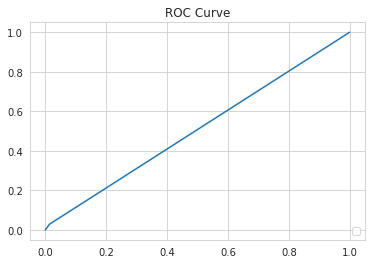

In [135]:
classifier = create_rnn_lstm()
accuracy = train_model(classifier, xtrainset_tfidf_ngram, trainset_y, xvalidset_tfidf_ngram, is_neural_net=True)
print ("RNN-LSTM, Word Embeddings",  accuracy)






In [138]:
#Confusion Matrix
ConfusionMatrix_Logistc = confusion_matrix(validset_y,LogitRegression)
ConfusionMatrix_Logistc

array([[3754,   54],
       [3249,   98]])

No handles with labels found to put in legend.


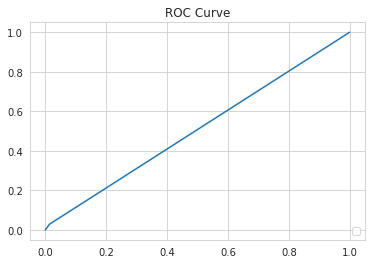

In [143]:
#ROC
falsePositiveRateLogistic, truePositiveRateLogistic, Thresholds_ROC_Logistic = metrics.roc_curve(validset_y,LogitRegression)
plt.plot(falsePositiveRateLogistic,truePositiveRateLogistic)
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [139]:
# AUC
AUC_Logistic_News = metrics.roc_auc_score(validset_y,LogitRegression)
AUC_Logistic_News

0.5075496399635444